### MovieLens 1M

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ratings = pd.read_csv('../../data/raw/ratings.dat', sep="::", usecols=[0, 1, 2, 3],
                          names=['userId', 'movieId', 'rating', 'timestamp'], engine='python')
movies = pd.read_csv('../../data/raw/movies.dat', sep="::", usecols=[0, 1, 2], names=['movieId', 'title', 'genres'],
                         engine='python')

Movies dataframe contains a separate entry for each movie in the dataset ofering 3 attributes:
- **id**
- movie **title**
- a list of **genres**

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies_no = len(movies)
print("Total number of movies = {0}".format(movies_no))

Total number of movies = 3883


Ratings dataframe contains 1 million ratings. Each rating has 4 attributes:
- **userId**: the unique identifier of the user who offered the movie rating
- **movieId**: the unique identifier of the rated movie
- **rating**: a numeric value from 1 to 5 stars with full-star increment
- **timestamp**: defines the datetime when the movie was rated

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
ratings_no = len(ratings)
print("Total number of ratings = {0}".format(ratings_no))

Total number of ratings = 1000209


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff967509828>]],
      dtype=object)

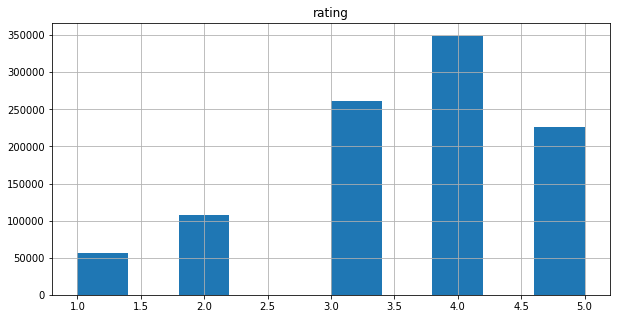

In [10]:
ratings.hist(column='rating', figsize=(10,5))


In [11]:
print("Average rating = {0}".format(ratings['rating'].mean()))

Average rating = 3.581564453029317


In [12]:
print("Average number of ratings per movie = {0}".format(ratings_no/movies_no))

Average number of ratings per movie = 257.5866597991244


In [14]:
nr_ratings_per_movie = ratings.groupby("movieId").size().reset_index(name='counts').sort_values('counts', ascending=False)
print("Number of ratings per movie:\n", nr_ratings_per_movie)
less_than_4_ratings = nr_ratings_per_movie[nr_ratings_per_movie['counts']<4]
print("\nNumber of movies that have less than 4 ratings: ", len(less_than_4_ratings))

Number of ratings per movie:
       movieId  counts
2651     2858    3428
253       260    2991
1106     1196    2990
1120     1210    2883
466       480    2672
...       ...     ...
3013     3237       1
725       763       1
607       624       1
2367     2563       1
3064     3290       1

[3706 rows x 2 columns]

Number of movies that have less than 4 ratings:  245


There are 245 movies that have a total of 1, 2 or 3 reviews. When training the Word2Vec model, these movies are going to be removed from the vocabulary.